In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('iris1')
jovian.set_colab_id('1uFrx2W3pdA2UIk1uHARK2ZAuvPkaYsB9')

# Question 1 :

Use the IRIS dataset and create a decision tree and check the accuracy label.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv("C:/Users/Nisha/Desktop/Jupyter notebooks/iris_zip/archive/iris.csv")
data.head()


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.shape



(150, 5)

In [ ]:
data.info

<bound method DataFrame.info of      sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]>

In [ ]:
data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

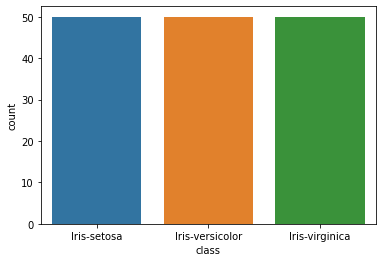

In [ ]:
sns.countplot(x=data["class"])

In [ ]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4:].values

print(X.shape, y.shape)

(150, 4) (150, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112, 1) (38, 1)


In [ ]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)

In [ ]:
tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=2, random_state=42)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [ ]:
ypred = tree_model.predict(X_test)


In [ ]:
accuracy_score(y_test, ypred)

0.9210526315789473

In [ ]:
cm = confusion_matrix(y_test, ypred)
cm

array([[15,  0,  0],
       [ 0,  8,  3],
       [ 0,  0, 12]], dtype=int64)

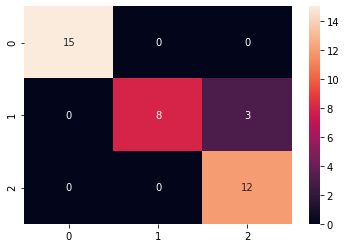

In [ ]:
sns.heatmap(cm, annot=True)

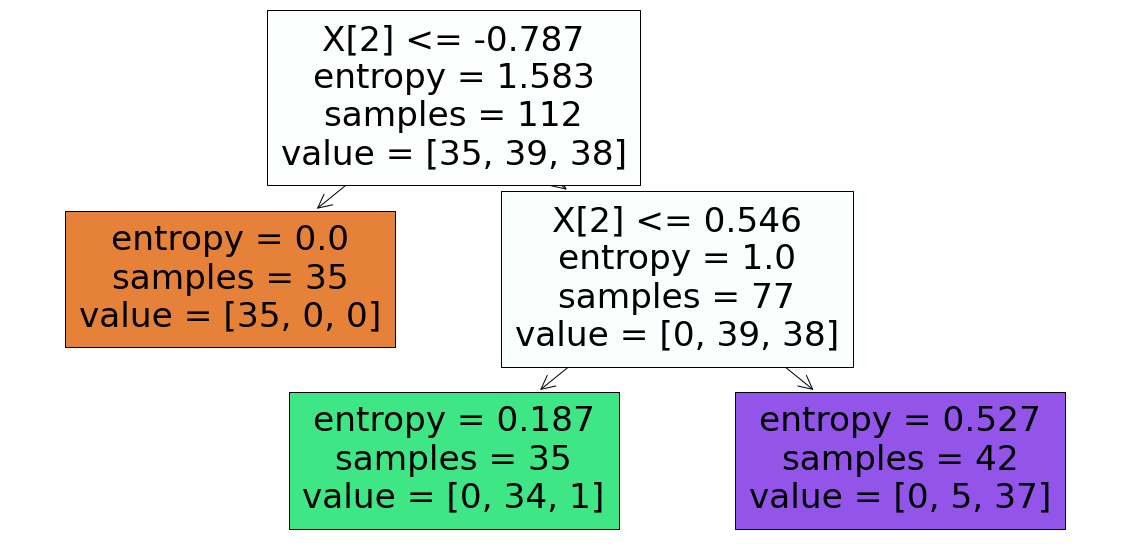

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model,filled=True)
plt.show()